In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#pip install pydot

In [3]:
#!pip install tensorflow

In [4]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()
X_train_digit

11490434/11490434 [==============================] - 10s 1us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

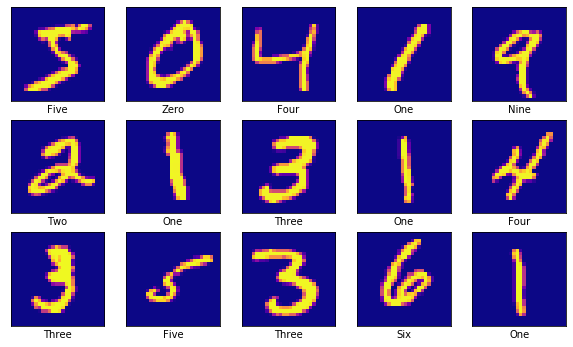

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='plasma')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [7]:
X_train_digit.shape    # shape means no.of column & No.of rows

(60000, 28, 28)

In [8]:
X_train_digit = X_train_digit.reshape(60000, 28, 28)
X_test_digit = X_test_digit.reshape(10000, 28, 28)

In [9]:
X_train_digit.shape

(60000, 28, 28)

In [10]:
y_test_digit.shape

(10000,)

In [11]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [12]:
X_train_digit.shape

(60000, 784)

In [13]:
y_test_digit.shape

(10000,)

In [14]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [16]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()       #for dense1 input is dense output, for dense2 input is dense output1,for dense3 input is dense output2,

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [18]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 7s 8ms/step - loss: 1.3612 - accuracy: 0.8541 - val_loss: 0.2973 - val_accuracy: 0.9224
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2400 - accuracy: 0.9367 - val_loss: 0.2286 - val_accuracy: 0.9437
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1765 - accuracy: 0.9520 - val_loss: 0.2199 - val_accuracy: 0.9451
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1432 - accuracy: 0.9601 - val_loss: 0.2001 - val_accuracy: 0.9500
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1246 - accuracy: 0.9654 - val_loss: 0.1514 - val_accuracy: 0.9614
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1070 - accuracy: 0.9693 - val_loss: 0.1794 - val_accuracy: 0.9579
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1044 - accuracy: 0.9706 - val_loss: 0.1699 - val_accuracy: 0.9621
Epoch 

In [19]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 [==============================] - 1s 2ms/step


In [20]:
y_predict[0]

array([1.1133594e-07, 1.3487438e-04, 5.2236064e-06, 5.2752515e-04,
       1.9718345e-06, 6.1564565e-06, 1.2855338e-13, 9.9881488e-01,
       3.7875767e-03, 5.0190434e-02], dtype=float32)

In [21]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

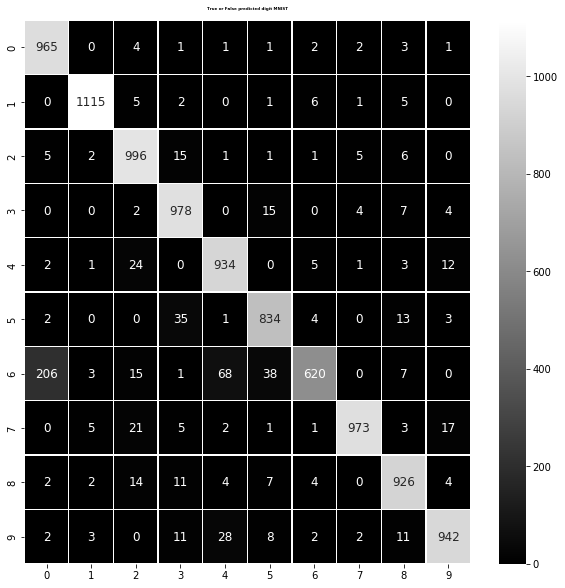

In [23]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 12},linewidths=0.3,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=4)
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       980
           1       0.99      0.98      0.98      1135
           2       0.92      0.97      0.94      1032
           3       0.92      0.97      0.95      1010
           4       0.90      0.95      0.92       982
           5       0.92      0.93      0.93       892
           6       0.96      0.65      0.77       958
           7       0.98      0.95      0.97      1028
           8       0.94      0.95      0.95       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.93     10000



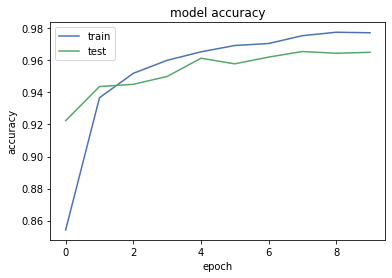

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


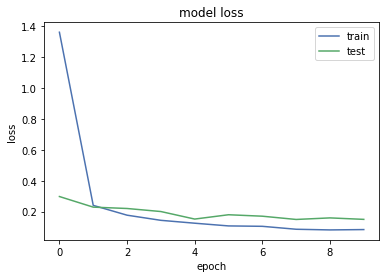

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [27]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 13ms/step


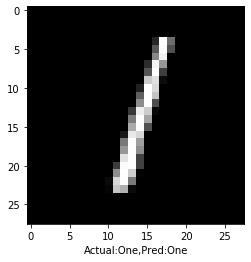

In [28]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()